## Assignment Content

<p>Each XLS or XLSX file contains a dataframe. ​</p>

<p>Load each XLS or XLSX file in your Jupyter notebook. </p>​
<ol>
For each dataframe, address missing values by taking the following steps:​

<li>Count the number of missing values in the dataframe; count the number of missing values per column​</li>
<li>Plot the distribution of data points using a histogram​</li>
<li>Create a lag plot (a lag plot shows t versus t+1)​</li>
<li>Based on the lag plot, state in a markdown cell whether the order of this data matters.</li> ​
Do one of the following (not both):​
<li>If the order of the data matters, then interpolate the missing values​</li>
<li>If the order of the data does not matter, fill in the missing data by sampling from the distribution</li>​
<li>Create a scatter plot using the columns in dataframe; no Nan entries should be present​</li>
<li>Submit a single Jupyter notebook with your analysis of the XLSX and XLS files.​</li>

Perform interpolation or sampling programmatically using Python (not manually)​ ​ ​
</ol>

In [61]:
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt


THE FIRST EXCEL

In [62]:
df1 = pd.read_excel('imputation_homework_04.xls') #Read the first .xls
df1

,Unnamed: 0,time,value
0,0,0.00,0.000000
1,1,0.02,2.528779
2,2,0.04,2.419020
3,3,0.06,0.665052
4,4,0.08,0.506655
...,...,...,...
495,495,9.90,-2.938926
496,496,9.92,-0.506655
497,497,9.94,-0.665052
498,498,9.96,-2.419020


In [63]:
df1.isna() #Check boolean values 

,Unnamed: 0,time,value
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
495,False,False,False
496,False,False,False
497,False,False,False
498,False,False,False


In [64]:
# Count total NaN at each column in a DataFrame
df1.isna().sum()

Unnamed: 0     0
time           0
value         50
dtype: int64

<AxesSubplot:xlabel='index'>

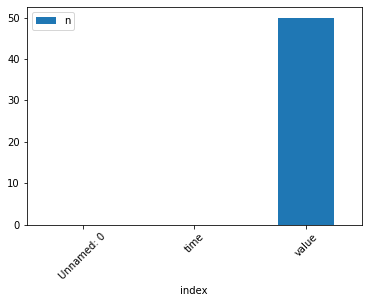

In [65]:
 #plot graph for NaN (missing values)in the df
df1.isna().sum().reset_index(name="n").plot.bar(x='index', y='n', rot=45)

Text(0, 0.5, 'Value')

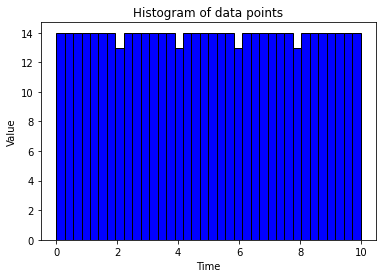

In [66]:
# matplotlib histogram
plt.hist(df1['time'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))

# Add labels
plt.title('Histogram of data points')
plt.xlabel('Time')
plt.ylabel('Value')

Text(0, 0.5, 'Value')

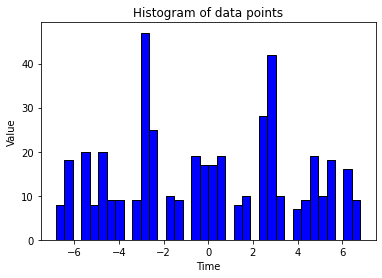

In [67]:
# matplotlib histogram
plt.hist(df1['value'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))


# Add labels
plt.title('Histogram of data points')
plt.xlabel('Time')
plt.ylabel('Value')

<Figure size 432x288 with 0 Axes>

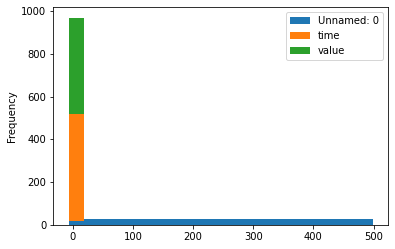

In [68]:
plt.figure();

df1.plot.hist(stacked=True, bins=20);

In [69]:
# #Lagplot
# from pandas.plotting import lag_plot

# plt.figure();

# spacing = np.linspace(-99 * np.pi, 99 * np.pi, num=500)

# df1 = pd.Series(0.1 * np.random.rand(500) + 0.9 * np.sin(spacing))

# lag_plot(df1);


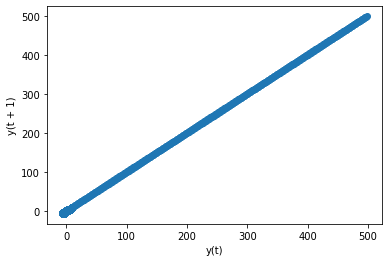

In [70]:
df1 = pd.plotting.lag_plot(df1, lag=1)

The order of the data is not random and the order matters.

In [71]:
import scipy
import scipy.interpolate #import 

In [72]:
#interpolate the values

df1.interpolate(method ='linear', limit_direction ='forward')



AttributeError: 'AxesSubplot' object has no attribute 'interpolate'

df1.value() #without NaN Values

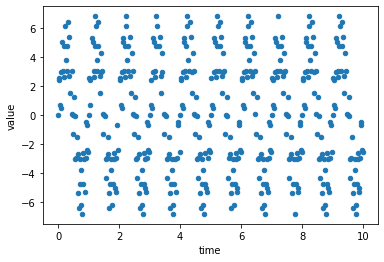

In [ ]:
#ScatterPlot without NaN values
ax1 = df1.plot.scatter(x='time',y='value',colormap='viridis') 

THE SECOND EXCEL 

In [ ]:
df2 = pd.read_excel('imputation_homework_29.xlsx') #Read the second .xls
df2

,Unnamed: 0,x,y
0,0,1.40,10.00
1,1,1.45,10.25
2,2,1.50,10.50
3,3,1.55,10.75
4,4,1.60,11.00
...,...,...,...
103,103,6.55,35.75
104,104,6.60,36.00
105,105,6.65,36.25
106,106,6.70,36.50


In [ ]:
df2.isna().sum() # null values

Unnamed: 0    0
x             9
y             0
dtype: int64

<AxesSubplot:xlabel='index'>

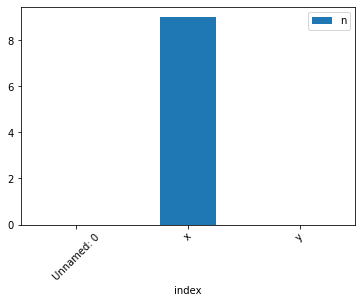

In [ ]:
#plot graph for NaN (missing values)in the df
df2.isna().sum().reset_index(name="n").plot.bar(x='index', y='n', rot=45)

Text(0, 0.5, 'y')

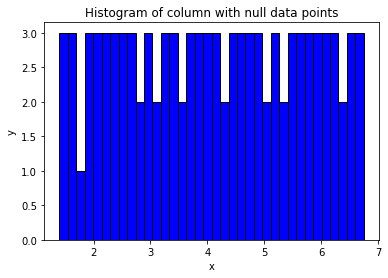

In [ ]:
# matplotlib histogram
plt.hist(df2['x'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))


# Add labels
plt.title('Histogram of column with null data points')
plt.xlabel('x')
plt.ylabel('y')


Text(0, 0.5, 'x')

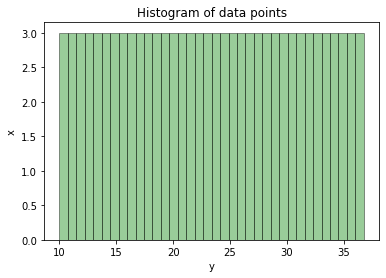

In [ ]:
# seaborn histogram
sns.distplot(df2['y'], hist=True, kde=False, 
             bins=int(180/5), color = 'green',
             hist_kws={'edgecolor':'black'})

# Add labels
plt.title('Histogram of data points')
plt.xlabel('y')
plt.ylabel('x')


<Figure size 432x288 with 0 Axes>

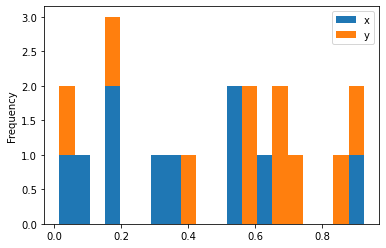

In [ ]:
#histogram
plt.figure();

df2.plot.hist(stacked=True, bins=20);

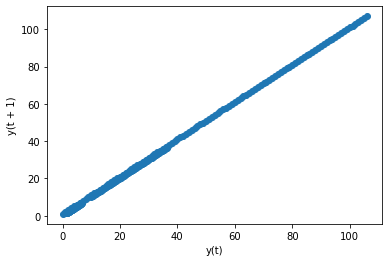

In [ ]:
df2 = pd.plotting.lag_plot(df2, lag=1)

The order of the values matters and it is not a random. So we Interpolate.

In [ ]:
df2['y'].interpolate(method ='linear', limit_direction ='forward') #interpolate

NameError: name 'df2' is not defined

In [79]:
df2.columns

Index(['Unnamed: 0', 'x', 'y'], dtype='object')

In [ ]:
df2.x #without NaN Values

0    0.194223
1    0.095713
2    0.627249
3    0.016129
4    0.556785
5    0.153071
6    0.318766
7    0.554383
8    0.925132
9    0.357398
Name: x, dtype: float64

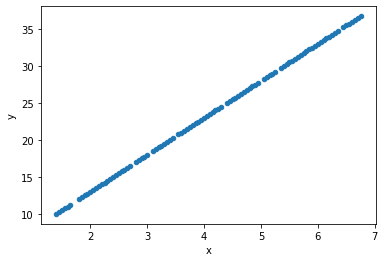

In [ ]:
#ScatterPlot without NaN values
ax2 = df2.plot.scatter(x='x',y='y',colormap='viridis') 

THE THIRD EXCEL FILE

In [73]:
df3 = pd.read_excel('imputation_homework_91.xlsx') #Read the first .xls
df3

,Unnamed: 0,date,value
0,0,2015-11-03,30.001248
1,1,2015-11-04,4.655104
2,2,2015-11-05,15.621201
3,3,2015-11-06,22.982759
4,4,2015-11-07,39.994644
...,...,...,...
847,847,2018-02-27,NaN
848,848,2018-02-28,14.196152
849,849,2018-03-01,21.058815
850,850,2018-03-02,21.038230


In [ ]:
df3.isna()


,Unnamed: 0,date,value
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
847,False,False,True
848,False,False,False
849,False,False,False
850,False,False,False


In [ ]:
df3.isna().sum() #missing values 

Unnamed: 0     0
date           0
value         84
dtype: int64

<AxesSubplot:xlabel='index'>

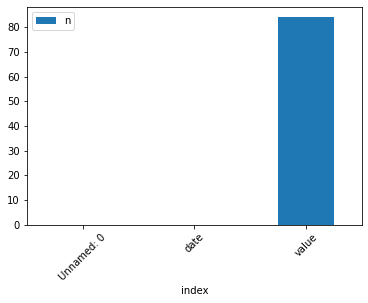

In [ ]:
#plot graph for NaN (missing values)in the df
df3.isna().sum().reset_index(name="n").plot.bar(x='index', y='n', rot=45)

/Users/shreya/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'value')

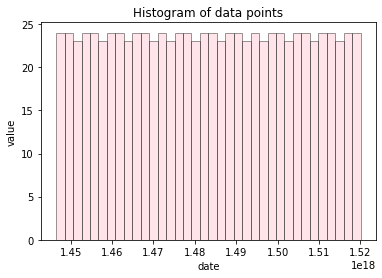

In [ ]:
# seaborn histogram
sns.distplot(df3['date'], hist=True, kde=False, 
             bins=int(180/5), color = 'pink',
             hist_kws={'edgecolor':'black'})

# Add labels
plt.title('Histogram of data points')
plt.xlabel('date')
plt.ylabel('value')


<Figure size 432x288 with 0 Axes>

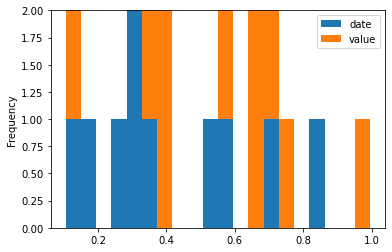

In [ ]:
plt.figure();

df3.plot.hist(stacked=True, bins=20);

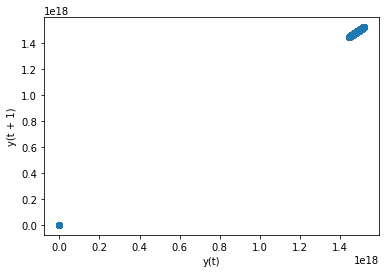

In [ ]:
df3['date'] = pd.to_numeric(pd.to_datetime(df3['date']))# to resolve the float() argument must be a string or a number, not 'Timestamp' error
df3 = pd.plotting.lag_plot(df3, lag=1)

The values are random here. So we need to perform the sampling.

In [ ]:
#imputing the missing values using mean 
value_mean = df3["value"].mean()

In [ ]:
#check the mean
value_mean

19.94200282260105

In [ ]:
df3["value"].fillna(value_mean,inplace=True)

In [ ]:
df3.value # null values replaced

0      30.001248
1       4.655104
2      15.621201
3      22.982759
4      39.994644
         ...    
847    19.942003
848    14.196152
849    21.058815
850    21.038230
851    25.674354
Name: value, Length: 852, dtype: float64

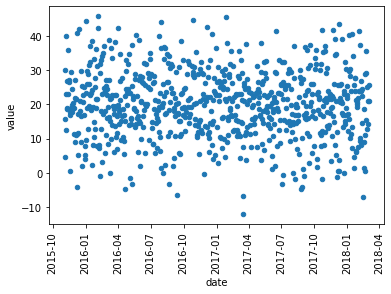

In [ ]:
ax3 = df3.plot.scatter(x='date',y='value',colormap='viridis', rot=90) 

## Histogram for df2

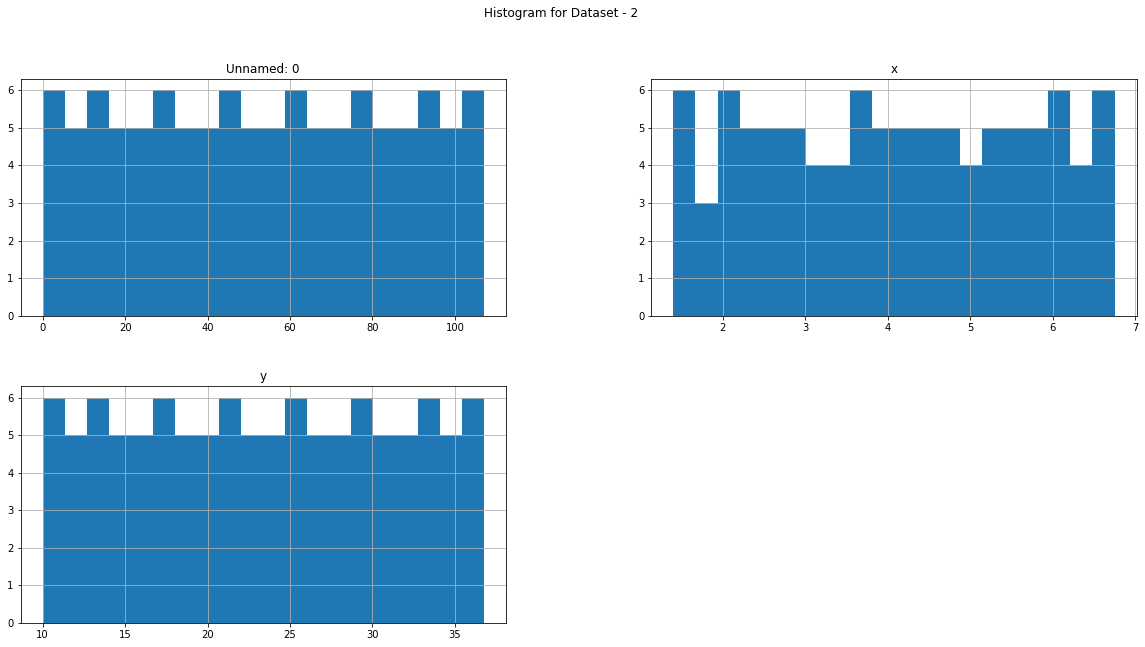

In [ ]:
df2.hist(bins = 20,figsize=(20, 10)) # plot histogram
_ = plt.suptitle("Histogram for Dataset - 2")# Add title

## Histogram for df3

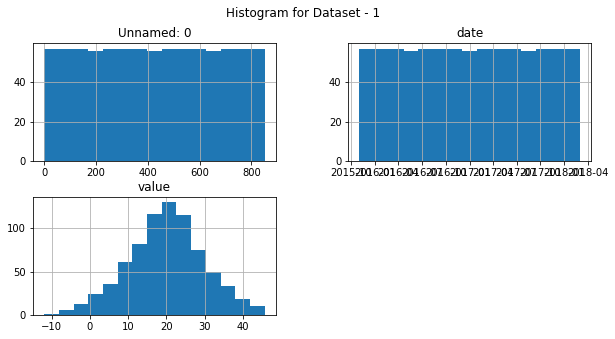

In [74]:
df3.hist(bins = 15,figsize=(10, 5)) # plot histogram
_ = plt.suptitle("Histogram for Dataset - 1") # Add title

df1.hist()
plt.suptitle("Histogram for Dataset - 1") # Add title